# Тестовое задание для Холода. 
#### Овчинникова Елена

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

## Задание 3. 
### Анализ Gender pay gap в Чехии и Венгрии, сравнение со средним результатом по EU.


Загрузим базу данных "Gender pay gap in unadjusted form by NACE Rev. 2 activity" с сайта Евростата: https://appsso.eurostat.ec.europa.eu/nui/submitViewTableAction.do

In [139]:
df = pd.read_csv('earn_gr_gpgr2_1_Data.csv')
df.head()

,TIME,GEO,UNIT,NACE_R2,Value,Flag and Footnotes
0,2009,European Union - 27 countries (from 2020),Percentage,"Industry, construction and services (except pu...",:,NaN
1,2009,European Union - 28 countries (2013-2020),Percentage,"Industry, construction and services (except pu...",:,NaN
2,2009,Euro area - 19 countries (from 2015),Percentage,"Industry, construction and services (except pu...",:,NaN
3,2009,Belgium,Percentage,"Industry, construction and services (except pu...",10.1,NaN
4,2009,Bulgaria,Percentage,"Industry, construction and services (except pu...",13.3,NaN


Выберем страну, где гендерный разрыв в оплате труда поменялся больше всего, и страну, где по истечении 10 лет (2011 - 2020) он почти не изменился — **Чехию и Венгрию**. 

Поскольку обе страны после Второй Мировой войны были в социалистическом лагере, а позже вступили в Европейский Союз, их социо-экономические политики сравнимы. Поэтому интересно изучить, почему в одной стране разница между зарплатой мужчинам 

In [140]:
# проверим название самой общей категории, которая будет использоваться в анализе данных
print(np.unique(df.NACE_R2))

['Industry, construction and services (except public administration, defense, compulsory social security)']


In [141]:
# выделим данные в отдельный сет, чтобы не нарушать изначальный  
# поскольку для анализа нужны две страны и средние показатели для Евросоюза, то выделим в датасет с этими странами
df2 = df[(df['TIME'] < 2021) & ((df['GEO'] == 'Hungary') | (df["GEO"] == 'Czechia') | (df["GEO"] == "European Union - 28 countries (2013-2020)")) & \
(df['NACE_R2'] == 'Industry, construction and services (except public administration, defense, compulsory social security)')]


# переменная с примечаниями не будет участвовать в этом анализе, удалим её из базы данных
df2.drop('Flag and Footnotes', axis=1, inplace=True)

/var/folders/5r/7bhf5tqj0wb9bbk62kmr6wk80000gp/T/ipykernel_50191/2675566332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('Flag and Footnotes', axis=1, inplace=True)


Сделаем срез данных по годам, нужным для анализа. Избавимся от данных за 2009-2010 годы

In [142]:
df2 = df2[(df2["TIME"] > 2010)]

# проверим результат
df2.head()

,TIME,GEO,UNIT,NACE_R2,Value
79,2011,European Union - 28 countries (2013-2020),Percentage,"Industry, construction and services (except pu...",17.1
83,2011,Czechia,Percentage,"Industry, construction and services (except pu...",22.6
97,2011,Hungary,Percentage,"Industry, construction and services (except pu...",18.0
118,2012,European Union - 28 countries (2013-2020),Percentage,"Industry, construction and services (except pu...",17.4
122,2012,Czechia,Percentage,"Industry, construction and services (except pu...",22.5


Последняя проверка — тип данных в дата сете

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 79 to 448
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TIME     30 non-null     int64 
 1   GEO      30 non-null     object
 2   UNIT     30 non-null     object
 3   NACE_R2  30 non-null     object
 4   Value    30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


Все переменные, кроме года наблюдения, являются объектами. То есть, нельзя вычислять или визуализировать данные по основному показателю, "Value". Для этого его нужно привести в вид числа, 'float'.

In [144]:
df2.loc[df2["Value"] == ":", "Value"] = np.nan
df2["Value"] = pd.to_numeric(df2["Value"])
df2["TIME"] = pd.to_numeric(df2["TIME"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 79 to 448
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIME     30 non-null     int64  
 1   GEO      30 non-null     object 
 2   UNIT     30 non-null     object 
 3   NACE_R2  30 non-null     object 
 4   Value    28 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ KB


/var/folders/5r/7bhf5tqj0wb9bbk62kmr6wk80000gp/T/ipykernel_50191/2253647363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Value"] = pd.to_numeric(df2["Value"])
/var/folders/5r/7bhf5tqj0wb9bbk62kmr6wk80000gp/T/ipykernel_50191/2253647363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TIME"] = pd.to_numeric(df2["TIME"])


### Визуализация

Посмотрим на динамику интересующих нас параметров в трех странах: Чехии, Венгрии и Евросоюзе.

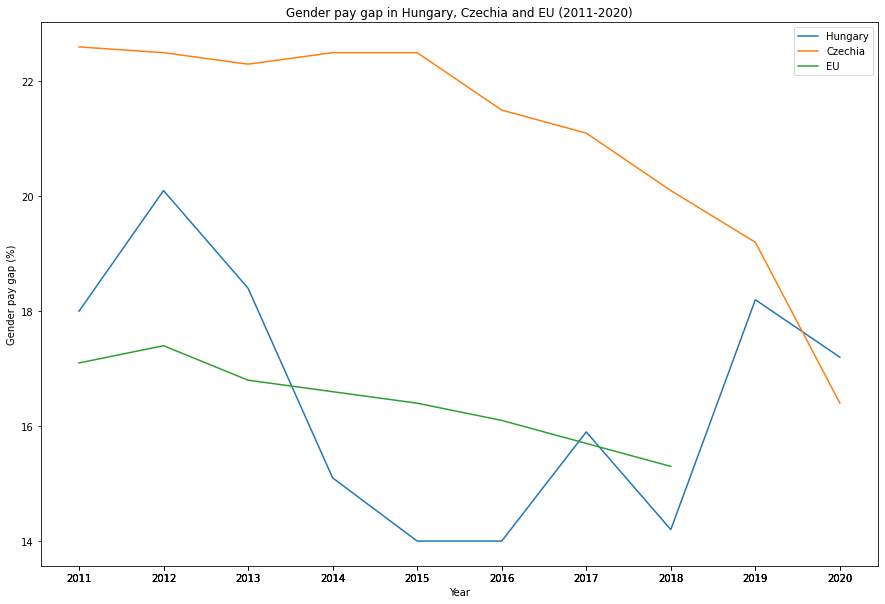

In [145]:
plt.figure(figsize=(15,10))

df_hun = df2[df2["GEO"] == "Hungary"]
df_hun1 = df2[df2["GEO"] == "Czechia"]
df_hun2 = df2[df2["GEO"] == "European Union - 28 countries (2013-2020)"]

plt.title('Gender pay gap in Hungary, Czechia and EU (2011-2020)')
plt.xlabel('Year')
plt.ylabel('Gender pay gap (%)')

plt.plot("TIME", "Value", data = df_hun, label = "Hungary")
plt.plot("TIME", "Value", data = df_hun1, label = "Czechia")
plt.plot("TIME", "Value", data = df_hun2, label = "EU")

plt.xticks(df2["TIME"])

plt.legend() ;


Можно увидеть, что даже если размах в gender pay gap у Венгрии оказался небольшим, изменений в разнице оплаты труда было много. Тем не менее, в 2020 году женщины зарабатывали в среднем на 17.7% меньше, чем мужчины. 

В Чехии эта разница меньше. Однако в отличие от Венгрии, в стране можно наблюдать продолжительное сокращение разницы в оплате труда. Несмотря на положительную динамику, гендерное неравенство в оплате труда в Чехии было на 5% больше, чем в среднем в Евросоюзе. 

В странах Евросоюза тем временем можно отметить незначительную, 2% за 8 лет, но положительную динамику в разнице оплаты труда по гендерному признаку.

## Задание 4. 
Отчет по датабазе Labour market slack by sex and age — annual data — сравнение мужчин и женщин. 
Визуализация результатов и комментарий к ним.

Скачаем базу данных с сайта Eurostat: https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=lfsi_sla_a_h&lang=en 

In [146]:
slack = pd.read_csv("lfsi_sla_a_1_Data.csv")

# выделим из этой базы данных только группу безработных людей
# это самая обширная группа по безработице, она представит наиболее полную картину как по каждой отдельной стране, так и по всем странам Еврособза 
slack[slack["WSTATUS"] == "Unemployed persons"].head()

,TIME,GEO,WSTATUS,SEX,AGE,UNIT,Value,Flag and Footnotes
3,2009,European Union - 27 countries (from 2020),Unemployed persons,Total,From 15 to 74 years,Percentage of extended labour force,9.0,NaN
4,2009,European Union - 27 countries (from 2020),Unemployed persons,Males,From 15 to 74 years,Percentage of extended labour force,8.9,NaN
5,2009,European Union - 27 countries (from 2020),Unemployed persons,Females,From 15 to 74 years,Percentage of extended labour force,9.0,NaN
18,2009,Euro area - 19 countries (from 2015),Unemployed persons,Total,From 15 to 74 years,Percentage of extended labour force,9.3,NaN
19,2009,Euro area - 19 countries (from 2015),Unemployed persons,Males,From 15 to 74 years,Percentage of extended labour force,9.3,NaN


Снова посмотрим типы данных в скачанном дата сете

In [147]:
slack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7020 entries, 0 to 7019
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TIME                7020 non-null   int64 
 1   GEO                 7020 non-null   object
 2   WSTATUS             7020 non-null   object
 3   SEX                 7020 non-null   object
 4   AGE                 7020 non-null   object
 5   UNIT                7020 non-null   object
 6   Value               7020 non-null   object
 7   Flag and Footnotes  590 non-null    object
dtypes: int64(1), object(7)
memory usage: 438.9+ KB


Как и в прошлом, нужная нам переменная — Value — строчи, а не числа. Также ряд наблюдений отстутствует и помечен не распознаваемым для Python знаком ":". Лучше всего закодировать такие наблюдения как np.nan, чтобы можно было удобнее работать с базой данных.

In [148]:
slack = slack[(slack["TIME"] > 2010)]
slack.loc[slack["Value"] == ":", "Value"] = np.nan
slack["Value"] = pd.to_numeric(slack["Value"])

slack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5940 entries, 1080 to 7019
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TIME                5940 non-null   int64  
 1   GEO                 5940 non-null   object 
 2   WSTATUS             5940 non-null   object 
 3   SEX                 5940 non-null   object 
 4   AGE                 5940 non-null   object 
 5   UNIT                5940 non-null   object 
 6   Value               5744 non-null   float64
 7   Flag and Footnotes  487 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 417.7+ KB


In [149]:
slack

,TIME,GEO,WSTATUS,SEX,AGE,UNIT,Value,Flag and Footnotes
1080,2011,European Union - 27 countries (from 2020),Underemployed persons working part-time,Total,From 15 to 74 years,Percentage of extended labour force,3.2,NaN
1081,2011,European Union - 27 countries (from 2020),Underemployed persons working part-time,Males,From 15 to 74 years,Percentage of extended labour force,1.9,NaN
1082,2011,European Union - 27 countries (from 2020),Underemployed persons working part-time,Females,From 15 to 74 years,Percentage of extended labour force,4.7,NaN
1083,2011,European Union - 27 countries (from 2020),Unemployed persons,Total,From 15 to 74 years,Percentage of extended labour force,9.6,NaN
1084,2011,European Union - 27 countries (from 2020),Unemployed persons,Males,From 15 to 74 years,Percentage of extended labour force,9.5,NaN
...,...,...,...,...,...,...,...,...
7015,2021,Turkey,Persons seeking work but not immediately avail...,Males,From 15 to 74 years,Percentage of extended labour force,NaN,NaN
7016,2021,Turkey,Persons seeking work but not immediately avail...,Females,From 15 to 74 years,Percentage of extended labour force,NaN,NaN
7017,2021,Turkey,Persons available to work but not seeking,Total,From 15 to 74 years,Percentage of extended labour force,NaN,NaN
7018,2021,Turkey,Persons available to work but not seeking,Males,From 15 to 74 years,Percentage of extended labour force,NaN,NaN


### Визуализация

Как и в прошлом задании, посмотрим на тренд в выбранных странах: Чехии, Венгрии и Евросоюзе.

#### Венгрия

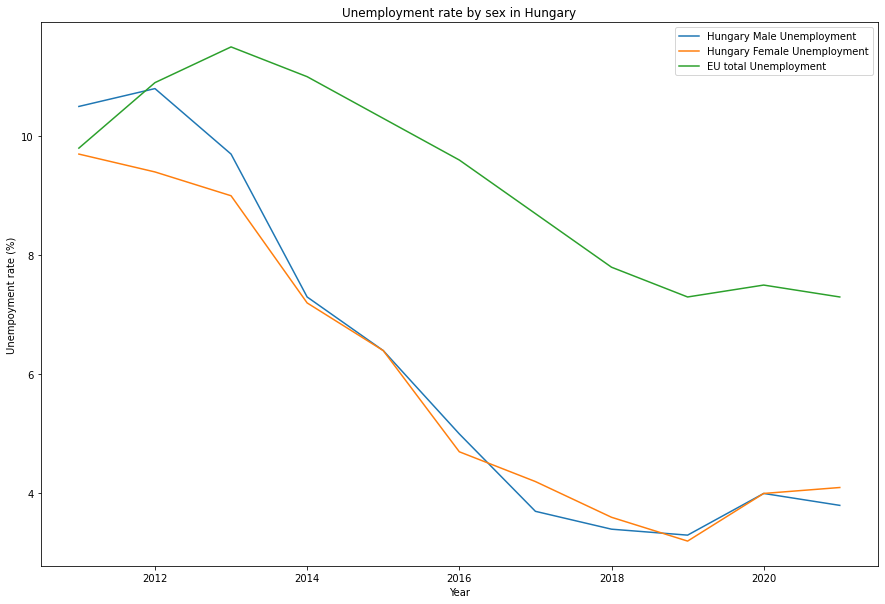

In [150]:
plt.figure(figsize=(15,10))

# fig1 = fig.add_subplot(1,2,1)
# fig2 = fig.add_subplot(1,2,2)

slack_men = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Males")]
slack_fem = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Females")]
slack_tot = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Total")]

plt.title('Unemployment rate by sex in Hungary')
plt.xlabel('Year')
plt.ylabel('Unempoyment rate (%)')

plt.plot("TIME", "Value", data = slack_men[slack_men["GEO"] == "Hungary"], label = "Hungary Male Unemployment")
plt.plot("TIME", "Value", data = slack_fem[slack_fem["GEO"] == "Hungary"], label = "Hungary Female Unemployment")
plt.plot("TIME", "Value", data = slack_tot[slack_tot["GEO"] == "Euro area - 19 countries  (from 2015)"], label = "EU total Unemployment")

# plt.plot("TIME", "Value", data = slack_men, label = "Czechia Male Unemployment")
# plt.plot("TIME", "Value", data = slack_fem, label = "Czechia Female Unemployment")
# plt.plot("TIME", "Value", data = slack_tot, label = "EU total Unemployment")

# plt.xticks(slack_fem["TIME"])

plt.legend() ;


Безработица в Венгрии имеет одинаковую тенденцию у обоих полов. Также интересно отметить значительно падение уровня безработицы в стране в 2012-2014 годах. Пик безработицы приходися на 2010 год у мужчин и 2011 у женщин. Минимум, в свою очередь, в 2019 году. 

Также стоит отметить, что уровень безработицы в Венгрии был на 4% меньше, чем в среднем по Европе с 2014 года. 

#### Чехия

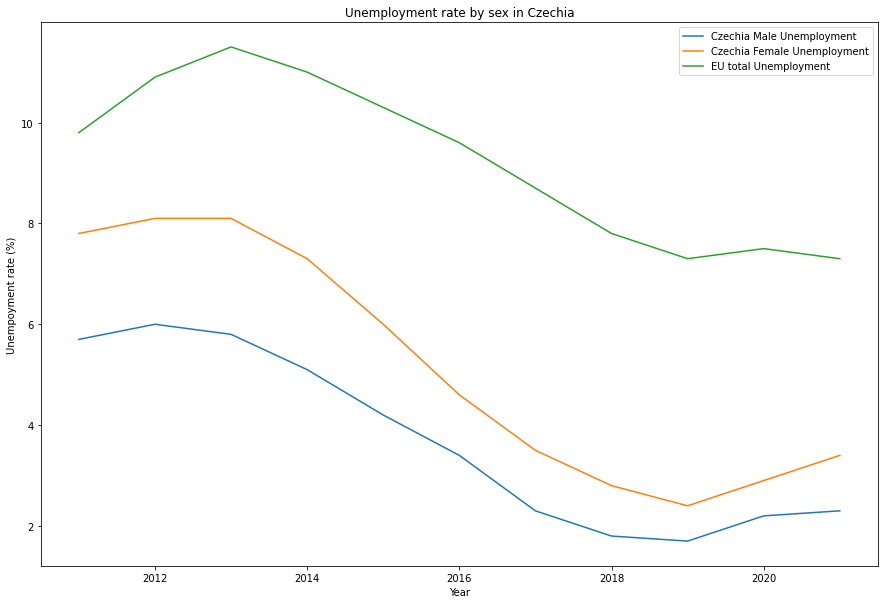

In [151]:
plt.figure(figsize=(15,10))

slack_men = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Males")]
slack_fem = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Females")]
slack_tot = slack[(slack["WSTATUS"] == "Unemployed persons") & \
                (slack["SEX"] == "Total")]

plt.title('Unemployment rate by sex in Czechia')
plt.xlabel('Year')
plt.ylabel('Unempoyment rate (%)')

plt.plot("TIME", "Value", data = slack_men[slack_men["GEO"] == "Czechia"], label = "Czechia Male Unemployment")
plt.plot("TIME", "Value", data = slack_fem[slack_fem["GEO"] == "Czechia"], label = "Czechia Female Unemployment")
plt.plot("TIME", "Value", data = slack_tot[slack_tot["GEO"] == "Euro area - 19 countries  (from 2015)"], label = "EU total Unemployment")

plt.legend() ;


Похожая ситуация сложилась и в Чехии. Безработица среди и мужчин, и женщин ниже среднего уровня Евросоюза. Однако динамика снижения более плавная: за шесть лет (2013 - 2018) безработица снизилась на 4% против пятипроцентного снижения за тот же период в Венгрии.

Не менее важно, что разница между уровнем безработицы среди мужчин и женщин в Чехии больше, чем в Венгрии — от двух до половины процента. 

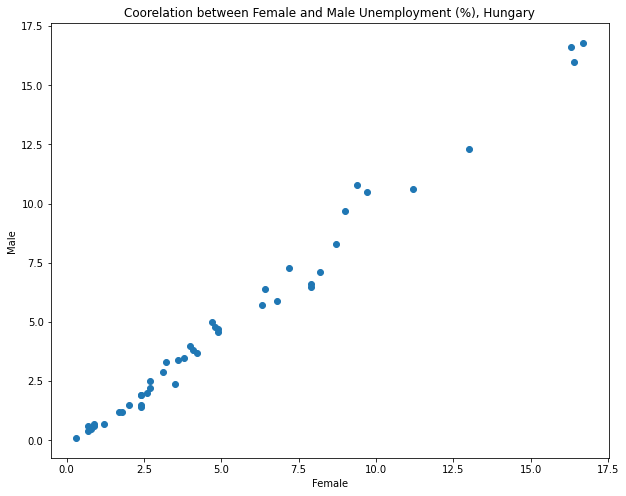

In [153]:
plt.figure(figsize=(10,8))

slack_country = slack[slack["GEO"] == "Hungary"]

plt.title('Coorelation between Female and Male Unemployment (%), Hungary')
plt.xlabel('Female')
plt.ylabel('Male')

plt.scatter(slack_country.loc[slack_country["SEX"] == 'Females', 'Value'], slack_country.loc[slack_country["SEX"] == 'Males', 'Value'])

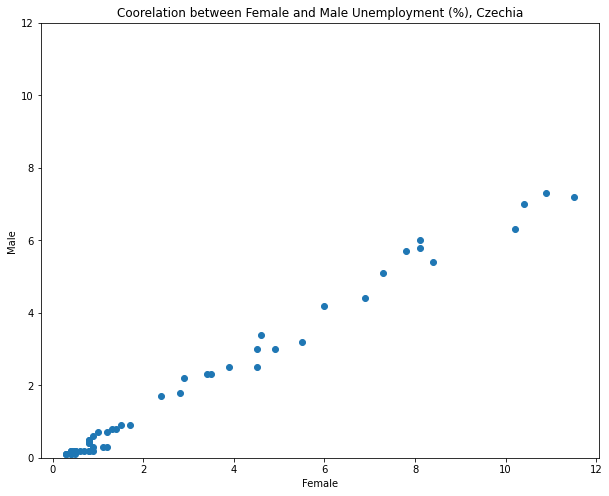

In [154]:
plt.figure(figsize=(10,8))

slack_country = slack[slack["GEO"] == "Czechia"]

plt.title('Coorelation between Female and Male Unemployment (%), Czechia')
plt.xlabel('Female')
plt.ylabel('Male')

# установим ось в в том же ранже, что и ось х, чтобы сохранить масштаб 
plt.ylim(0, 12)

plt.scatter(slack_country.loc[slack_country["SEX"] == 'Females', 'Value'], slack_country.loc[slack_country["SEX"] == 'Males', 'Value'])

Рассмотрим уровни безработицы в интересующих нас странах, а также во всех странах Европейского Союза. Я выбираю два года: 2013, когда уровень безработицы в среднем в ЕС был наибольшим и 2019, когда он был наименьшим. 

/Users/Helen/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Helen/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Unemployments rate in 2019 (%)'), (0.0, 30.0)]

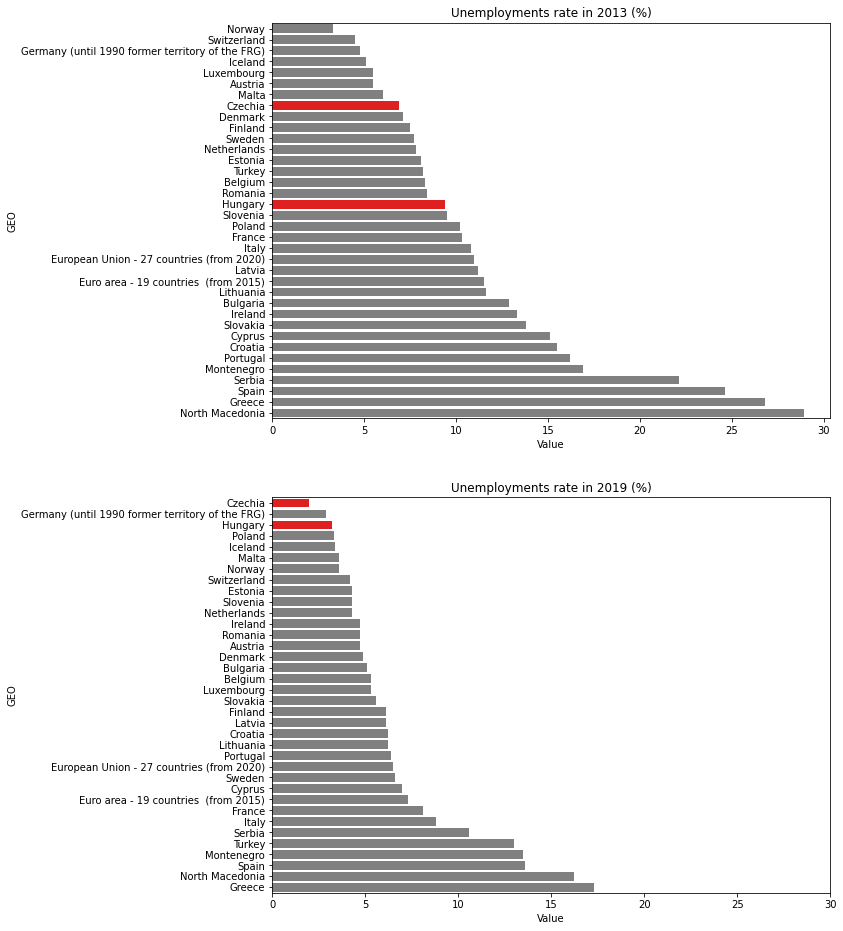

In [158]:
fig, ax = plt.subplots(2,1, 
                        figsize= (10, 16))

slack_2013 = slack[(slack["TIME"] == 2013) & (slack["WSTATUS"] == "Unemployed persons") & (slack["SEX"] == "Total")].sort_values("Value")
slack_2019 = slack[(slack["TIME"] == 2019) & (slack["WSTATUS"] == "Unemployed persons") & (slack["SEX"] == "Total")].sort_values("Value")

colors1 = np.where((slack_2013["GEO"] == "Hungary") | (slack_2013["GEO"] == "Czechia"), 'red', 'grey')
colors2 = np.where((slack_2019["GEO"] == "Hungary") | (slack_2019["GEO"] == "Czechia"), 'red', 'grey')

sns.barplot(slack_2013["Value"],slack_2013["GEO"] , orient='h', palette=colors1, ax=ax[0]).set(title= "Unemployments rate in 2013 (%)")
sns.barplot(slack_2019["Value"], slack_2019["GEO"] , orient='h', palette=colors2, ax=ax[1]).set(title= "Unemployments rate in 2019 (%)", xlim= (0,30))

# fig.tight_layout()

Так, можно заметить, что общий уровень безработицы во всех странах Евросоюза снизился почти в два раза: с максимального уровня в 29% у Северной Македонии в 2013 до максимума в 16% у Греции. 

Интересующие нас страны, Венгрия и Чехия, значительно улучшили свои показатели в сравнении с другими странами. Если Чехия в 2013 году была восьмой страной по уровню безработицы, то уже семь лет спустя она стала первой страной с наименьшим процентом безработицы. К похожему успеху пришла и Венгрия: страна поднялась на 14 позиций. 